<a href="https://colab.research.google.com/github/jainamga/ds-data/blob/main/Jainam's_DS_Project_Olivetti_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [105]:
# dataset from github to colab

!git clone https://github.com/jainamga/ds-data.git

fatal: destination path 'ds-data' already exists and is not an empty directory.


In [106]:
#importing all the libraries

import numpy as np
import pandas as pd



import matplotlib.pyplot as plt
from sklearn.utils.validation import check_random_state

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics




Loading the olivetti data set

In [107]:
image=np.load("/content/ds-data/olivetti_faces.npy")
label=np.load("/content/ds-data/olivetti_faces_target.npy")

What does the data consist of

In [108]:
print("Number of images {}".format(len(image)))
print("Number of target {}".format(len(np.unique(label))))

Number of images 400
Number of target 40


Viewing the image of the people

In [109]:
def image_visual(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()

    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

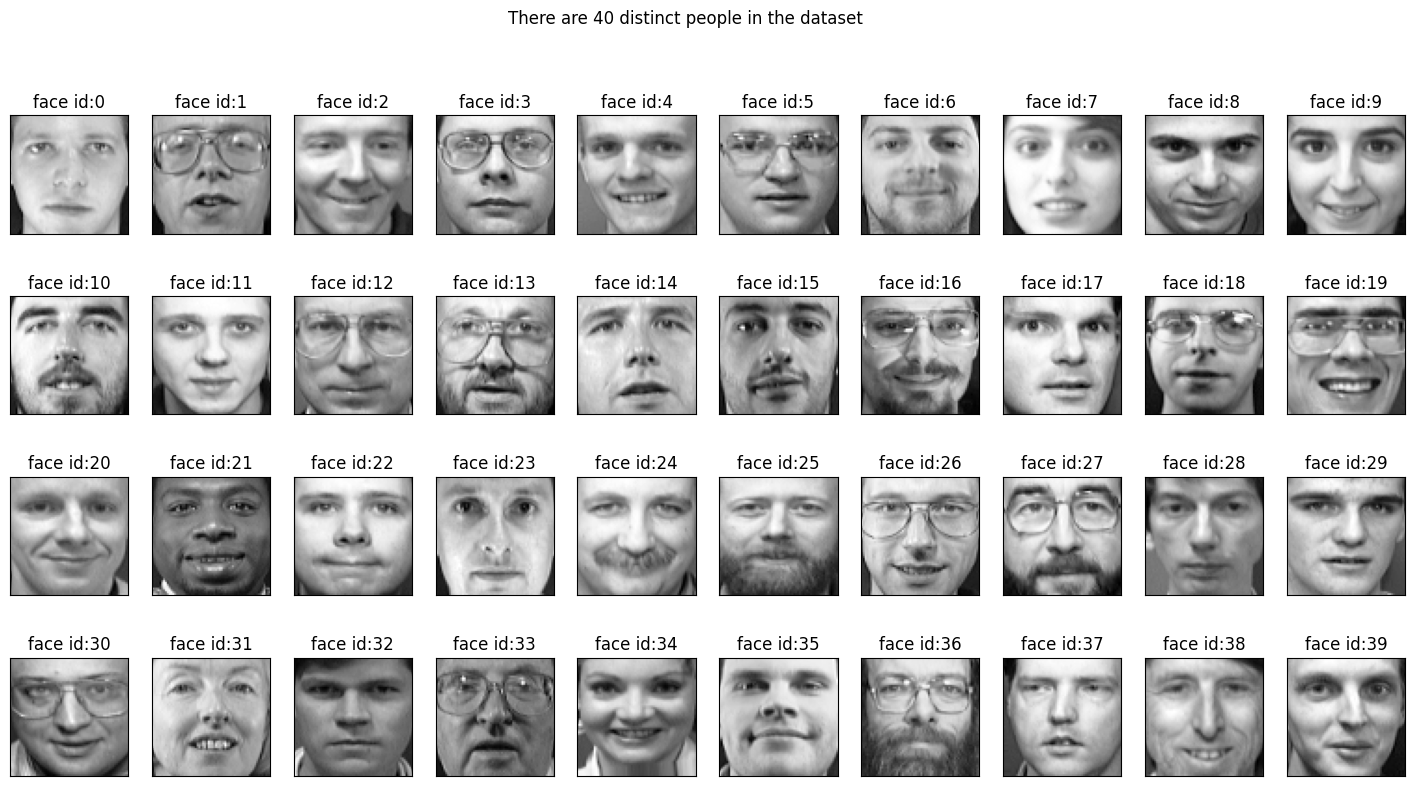

In [110]:
image_visual(image, np.unique(label))

<a class="anchor" id="2.2.">

Converting matrix to vector so that the dimensions can be reduced


In [111]:
#We reshape images for machine learning  models as each pixel acts as a feature
X=image.reshape((image.shape[0],image.shape[1]*image.shape[2]))
print("Shape of X",X.shape)

Shape of X (400, 4096)


In [112]:
#Splitting the images into training and testing
#The training will contain 7 images of each individual and the testing will contain 3 images of each individual

X_train, X_test, y_train, y_test=train_test_split(X, label, test_size=0.3, stratify=label, random_state=0)
print("Shape of X_train :",X_train.shape)
print("Shape of y_train {}".format(y_train.shape))

Shape of X_train : (280, 4096)
Shape of y_train (280,)


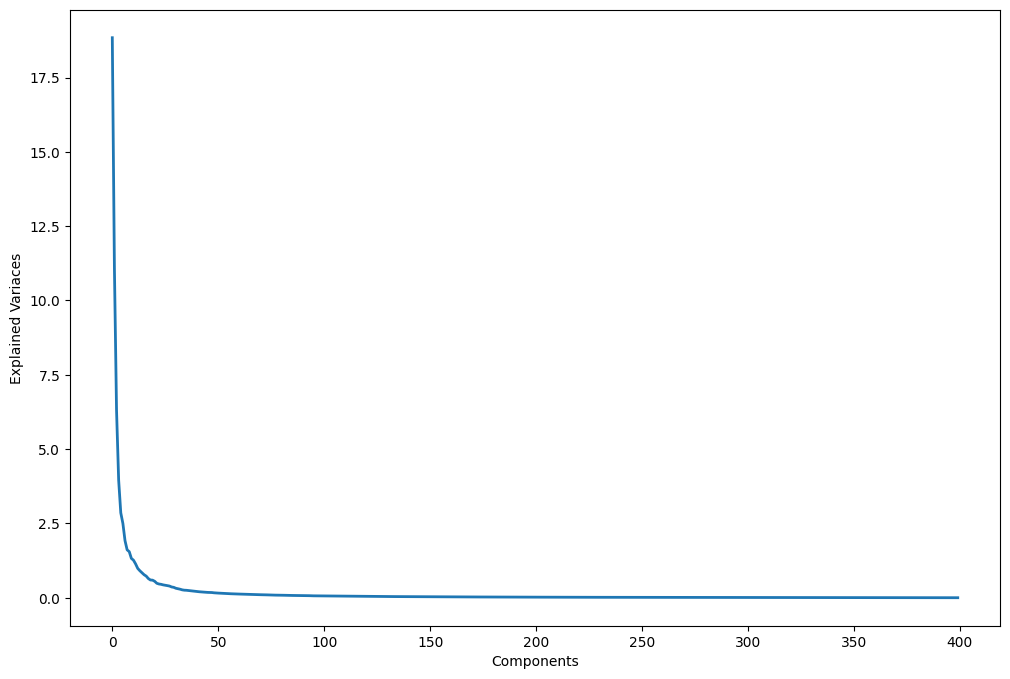

In [113]:
#PCA is applied on the entire data

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()
explained_variance_ratio = pca.explained_variance_ratio_


In the figure above, it can be seen that 90 and more PCA components represent the same data. Now let's make the classification process using 90 PCA components.

In [114]:
# print(explained_variance_ratio)
print(pca.explained_variance_ratio_.round(2)[:10])

[0.24 0.14 0.08 0.05 0.04 0.03 0.02 0.02 0.02 0.02]


In [115]:
n_components=90

In [116]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

In [117]:
#PCA is applied on training and testing data

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [118]:
#Applying SVC on the data

clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.93


<Axes: >

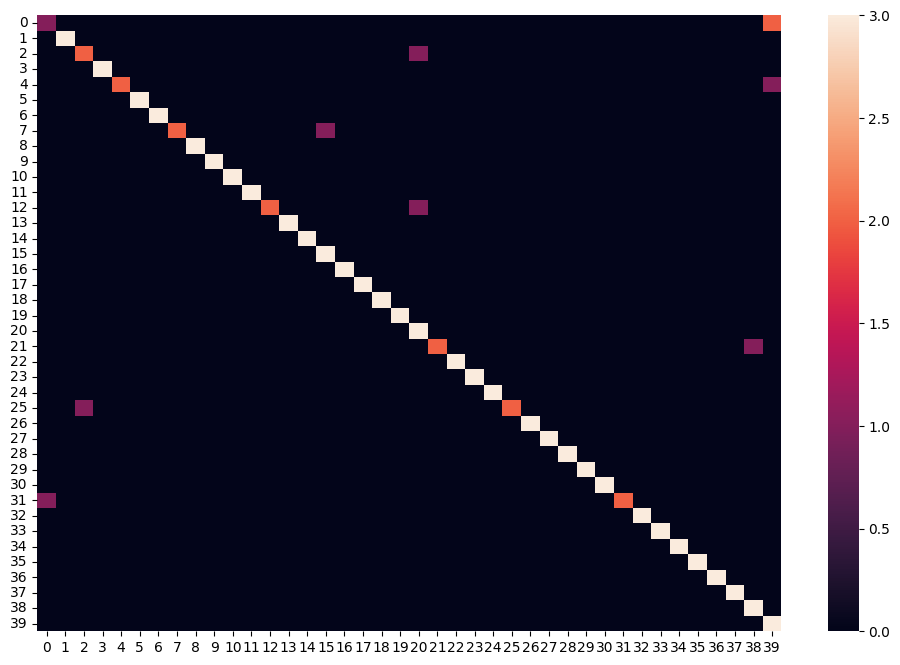

In [119]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [120]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [121]:
#training and evaluating models

models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
from sklearn.linear_model import SGDClassifier


models.append(("SDG",SGDClassifier()))

for name, model in models:

    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision score:{:0.2f}".format(metrics.precision_score(y_test, y_pred,average='macro')))
    print("F1 score:{:0.2f}".format(metrics.f1_score(y_test, y_pred,average='macro')))
    print("Recall score:{:0.2f}".format(metrics.recall_score(y_test, y_pred,average='macro')))
    print()

========== LDA RESULT ==========
Accuracy score:0.93
Precision score:0.95
F1 score:0.92
Recall score:0.93

========== LR RESULT ==========
Accuracy score:0.93
Precision score:0.96
F1 score:0.93
Recall score:0.93

========== DT RESULT ==========
Accuracy score:0.63
Precision score:0.72
F1 score:0.63
Recall score:0.63

========== SVM RESULT ==========
Accuracy score:0.93
Precision score:0.94
F1 score:0.92
Recall score:0.93

========== SDG RESULT ==========
Accuracy score:0.88
Precision score:0.89
F1 score:0.87
Recall score:0.88



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
